# Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# to split the datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

!pip install feature_engine
!pip install category_encoders
!pip install scikit-optimize
!pip install optuna

     |████████████████████████████████| 307kB 6.6MB/s 
     |████████████████████████████████| 174kB 9.5MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 143kB 9.5MB/s 
     |████████████████████████████████| 112kB 10.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11136 sha256=6196bf7c971cf15e6ea898b881278b51fb517b40d68f4dcfed3f5d4b36759191
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Online Course/Hyperparameter Optimization')
!pwd

/content/drive/My Drive/Online Course/Hyperparameter Optimization


# Cross Validation

In [ ]:
from scipy.special import comb

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)

# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

## K-Fold

In [ ]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

# estimate generalization error
clf =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=kf, # k-fold
)

print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9685948620886812  +-  0.004426551735731128
mean test set accuracy:  0.9497784810126582  +-  0.013608919570498668


## Repeated K-Fold

In [ ]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=4,
)

print('We expect K * n performance metrics: ', 5*10)

# estimate generalization error
clf =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=rkf, # k-fold
)

print('Number of metrics obtained: ', len(clf['test_score']))

clf['test_score']

print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

We expect K * n performance metrics:  50
Number of metrics obtained:  50
mean train set accuracy:  0.9602369827093316  +-  0.0067636481964756115
mean test set accuracy:  0.9459683544303796  +-  0.02296291674821915


## Leave One Out

In [ ]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# Leave One Out Cross-Validation
loo = LeaveOneOut()

print('We expect as many metrics as data in the train set: ', len(X_train))

# estimate generalization error
clf =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=loo, # k-fold
)

print('Number of metrics obtained: ', len(clf['test_score']))

len(clf['test_score'])

print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

We expect as many metrics as data in the train set:  398
Number of metrics obtained:  398
mean train set accuracy:  0.9575269293571131  +-  0.0012588096154312522
mean test set accuracy:  0.9447236180904522  +-  0.22851893469149895


## Leave P Out

In [ ]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# Leave P Out Cross-Validation
lpo = LeavePOut(p=2)

# I take a smaller sample of the data, otherwise
# my computer runs out of memory
X_train_small = X_train.head(100)
y_train_small = y_train.head(100)

# The number of combinations of N things taken k at a time.
print('We expect : ', comb(100,2), ' metrics')


# estimate generalization error
clf =  cross_validate(
    logit,
    X_train_small, 
    y_train_small,
    scoring='accuracy',
    return_train_score=True,
    cv=lpo, # k-fold
)

print('Number of metrics obtained: ', len(clf['test_score']))

print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

We expect :  4950.0  metrics
Number of metrics obtained:  4950
mean train set accuracy:  0.9700041228612658  +-  0.0032331283783864494
mean test set accuracy:  0.918989898989899  +-  0.19306928127674033


## Stratified K-Fold

In [ ]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# Leave P Out Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# estimate generalization error
clf =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=skf, # k-fold
)

len(clf['test_score'])

print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9610536069872438  +-  0.004708967629151459
mean test set accuracy:  0.944620253164557  +-  0.02364900328794808


# Group Cross Validation

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    GroupKFold,
    LeaveOneGroupOut,
    cross_validate,
    GridSearchCV,
)

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

# add patients arbitrarily for the demo
patient_list = [p for p in range(10)]

np.random.seed(1)
X["patient"] = np.random.choice(patient_list, size=len(X))

X.head()

# split dataset into a train and test set
# this time, we leave data from 1 patient out

# all patients except 7
X_train = X[X['patient']!=7]
y_train = y.iloc[X_train.index]

# patient 7
X_test = X[X['patient']==7]
y_test = y.iloc[X_test.index]

# the test set will not be used in the cross-validation!

In [ ]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)

# Group K-Fold Cross-Validation
gkf = GroupKFold(n_splits=5)

# estimate generalization error
clf =  cross_validate(
    logit,
    X_train.drop('patient', axis=1), # drop the patient column, this is not a predictor
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=gkf.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),
)

clf['test_score']

print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

# # fit the model to entire train set
logit.fit(
    X_train.drop('patient', axis=1), # drop the patient column, this is not a predictor
    y_train)

# let's get the predictions
train_preds = logit.predict(X_train.drop('patient', axis=1))
test_preds = logit.predict(X_test.drop('patient', axis=1))

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

mean train set accuracy:  0.9716834972481945  +-  0.004992863539378984
mean test set accuracy:  0.954930393756672  +-  0.01565426086525203
Train Accuracy:  0.9721669980119284
Test Accuracy:  0.9545454545454546


# Nested Cross Validation

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    GridSearchCV,
    train_test_split,
)

# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_train = X_train.dropna()
y_train = y_train.dropna()

In [ ]:
def nested_cross_val(model, grid):

    # configure the outer loop cross-validation procedure
    cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

    # configure the inner loop cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)

    # enumerate splits
    outer_results = list()
    inner_results = list()

    for train_ix, test_ix in cv_outer.split(X_train):

        # split data
        xtrain, xtest = X_train.reindex(index = train_ix), X_train.reindex(index = test_ix)
        ytrain, ytest = y_train.reindex(index=train_ix), y_train.reindex(index=test_ix)

        # define search
        search = GridSearchCV(
            model, grid, scoring='accuracy', cv=cv_inner, refit=True)

        # execute search
        search.fit(xtrain, ytrain)

        # evaluate model on the hold out dataset
        yhat = search.predict(xtest)

        # evaluate the model
        accuracy = accuracy_score(ytest, yhat)

        # store the result
        outer_results.append(accuracy)
        
        inner_results.append(search.best_score_)

        # report progress
        print(' >> accuracy_outer=%.3f, accuracy_inner=%.3f, cfg=%s' %
              (accuracy, search.best_score_, search.best_params_))

    # summarize the estimated performance of the model
    print()
    print('accuracy_outer: %.3f +- %.3f' %
          (np.mean(outer_results), np.std(outer_results)))
    print('accuracy_inner: %.3f +- %.3f' %
          (np.mean(inner_results), np.std(inner_results)))

    return search.fit(X_train, y_train)

In [ ]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=1, solver='liblinear', random_state=4, max_iter=10000)

# hyperparameter space
logit_param = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
)

logit_search = nested_cross_val(logit, logit_param)

# let's get the predictions

X_train_preds = logit_search.predict(X_train)
X_test_preds = logit_search.predict(X_test)

# let's examine the accuracy
print('Train accuracy: ', accuracy_score(y_train, X_train_preds))
print('Test accuracy: ', accuracy_score(y_test, X_test_preds))

 >> accuracy_outer=0.980, accuracy_inner=0.945, cfg={'C': 1, 'penalty': 'l1'}
 >> accuracy_outer=0.941, accuracy_inner=0.955, cfg={'C': 10, 'penalty': 'l2'}
 >> accuracy_outer=0.921, accuracy_inner=0.958, cfg={'C': 10, 'penalty': 'l2'}
 >> accuracy_outer=0.980, accuracy_inner=0.960, cfg={'C': 10, 'penalty': 'l1'}
 >> accuracy_outer=0.960, accuracy_inner=0.950, cfg={'C': 10, 'penalty': 'l2'}

accuracy_outer: 0.956 +- 0.023
accuracy_inner: 0.954 +- 0.005
Train accuracy:  0.9840954274353877
Test accuracy:  0.9545454545454546


In [ ]:
# Random Forest
rf_param = dict(
    n_estimators=[10, 50, 100, 200],
    min_samples_split=[0.1, 0.3, 0.5, 1.0],
    max_depth=[1,2,3,None],
    )

rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    max_depth=3,
    random_state=0,
    n_jobs=-1,
    )
rf_search = nested_cross_val(rf, rf_param)

# let's get the predictions

X_train_preds = rf_search.predict(X_train)
X_test_preds = rf_search.predict(X_test)

# let's examine the accuracy
print('Train accuracy: ', accuracy_score(y_train, X_train_preds))
print('Test accuracy: ', accuracy_score(y_test, X_test_preds))

 >> accuracy_outer=0.901, accuracy_inner=0.965, cfg={'max_depth': None, 'min_samples_split': 0.1, 'n_estimators': 200}
 >> accuracy_outer=0.911, accuracy_inner=0.955, cfg={'max_depth': None, 'min_samples_split': 0.1, 'n_estimators': 10}
 >> accuracy_outer=0.931, accuracy_inner=0.963, cfg={'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 50}
 >> accuracy_outer=0.990, accuracy_inner=0.948, cfg={'max_depth': None, 'min_samples_split': 0.1, 'n_estimators': 100}
 >> accuracy_outer=0.980, accuracy_inner=0.950, cfg={'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 50}

accuracy_outer: 0.943 +- 0.036
accuracy_inner: 0.956 +- 0.007
Train accuracy:  0.9681908548707754
Test accuracy:  0.9090909090909091


# Basic Search Algorithm

## Grid Search

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
)

# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [ ]:
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=[10, 20, 50, 100],
    min_samples_split=[0.1, 0.3, 0.5],
    max_depth=[1,2,3,4,None],
    )

print('Number of hyperparam combinations: ', 
      len(param_grid['n_estimators'])
      *len(param_grid['min_samples_split'])
      *len(param_grid['max_depth']))

# set up the search
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

# the best hyperparameters are stored in an attribute
search.best_params_

# we also find the data for all models evaluated
results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

Number of hyperparam combinations:  60
(60, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015377,0.000478,0.002559,0.000164,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58
1,0.029829,0.001591,0.002921,0.000351,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.978333,0.952000,0.968667,0.986897,0.970068,0.971193,0.011607,52
2,0.068934,0.002686,0.002541,0.000152,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.997000,0.963667,0.983333,0.993103,0.980272,0.983475,0.011647,33
3,0.136100,0.004550,0.002425,0.000045,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",1.000000,0.974333,0.988667,0.997241,0.983673,0.988783,0.009298,17
4,0.016712,0.002303,0.002551,0.000550,1,0.3,10,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58


Train roc_auc:  1.0
Test roc_auc:  0.996766607877719


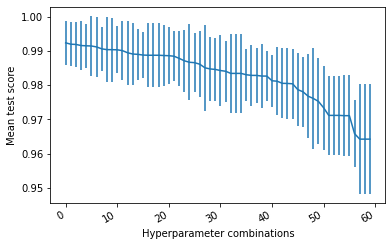

In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].tail()

# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

                    mean_test_score  std_test_score
param_n_estimators                                 
10                         0.973490        0.006358
20                         0.980886        0.005249
50                         0.987435        0.002506
100                        0.990330        0.001649

The optimal hyperparameter seems to be somewhere between 60 and 100.


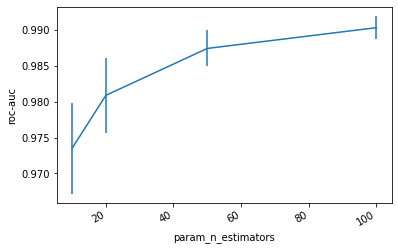

In [ ]:
# let's make a function to evaluate the model performance based on
# single hyperparameters

def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp

# performance change for n_estimators
tmp = summarize_by_param('param_n_estimators')

print(tmp.head())

tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')
print("\nThe optimal hyperparameter seems to be somewhere between 60 and 100.")

The optimal hyperparameter seems to be between 2 and 3.


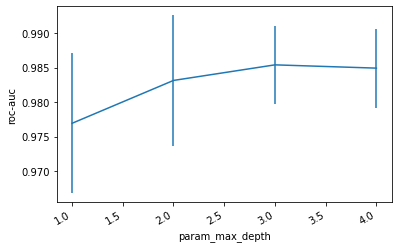

In [ ]:
tmp = summarize_by_param('param_max_depth')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')
print("The optimal hyperparameter seems to be between 2 and 3.")

## Random Search

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split,
)

# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

(60, 17)


Text(0.5, 0, 'Hyperparameter combinations')

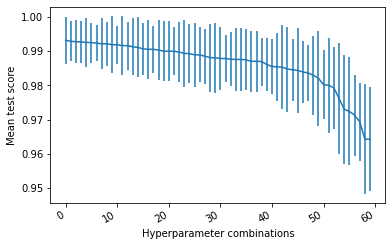

In [ ]:
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    loss=('deviance', 'exponential'),
    )

# set up the search
search = RandomizedSearchCV(gbm,
                            param_grid,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

# the best hyperparameters are stored in an attribute

search.best_params_

# we also find the data for all models evaluated

results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

The optimal hyperparameter seems to be somewhere between 60 and 100.


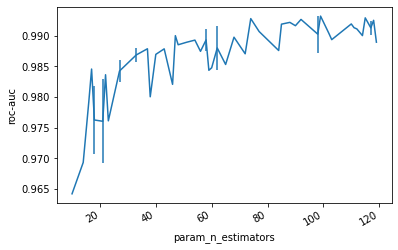

In [ ]:
# let's make a function to evaluate the model performance based on
# single hyperparameters

def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp

# performance change for n_estimators

tmp = summarize_by_param('param_n_estimators')

tmp.head()

tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')
print("The optimal hyperparameter seems to be somewhere between 60 and 100.")

## Randomized Search with Scikit Optimize

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from skopt import dummy_minimize # for the randomized search
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

# load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [ ]:
# With Integer, we create a space of integers, sampled uniformly
# between the minimum and maximum indicated values

Integer(10, 120, name="n_estimators")

# With Real, we create a space of real values, sampled uniformly
# between the minimum and maximum indicated values

Real(0, 1, name="min_samples_split")

# With Categorical, we create a space of categories

Categorical(['deviance', 'exponential'], name="loss")

# determine the hyperparameter space

param_grid = [
    Integer(10, 120, name="n_estimators"),
    Real(0, 0.999, name="min_samples_split"),
    Integer(1, 5, name="max_depth"),
    Categorical(['deviance', 'exponential'], name="loss"),
]

# Scikit-optimize parameter grid is a list
type(param_grid)

list

Best parameters:
- n_estimators=112
- min_samples_split=0.669967
- max_depth=3
- loss=deviance


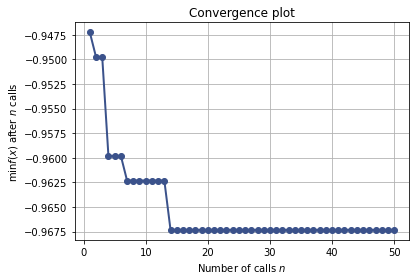

In [ ]:
# set up the gradient boosting classifier

gbm = GradientBoostingClassifier(random_state=0)

# We design a function to maximize the accuracy, of a GBM,
# with cross-validation

# the decorator allows our objective function to receive the parameters as
# keyword arguments. This is a requirement for scikit-optimize.

@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    gbm.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            gbm, 
            X_train,
            y_train,
            cv=3,
            n_jobs=-4,
            scoring='accuracy')
    )

    # negate because we need to minimize
    return -value

# dummy_minimize performs the randomized search

search = dummy_minimize(
    objective,  # the objective function to minimize
    param_grid,  # the hyperparameter space
    n_calls=50,  # the number of subsequent evaluations of f(x)
    random_state=0,
)

# function value at the minimum.
# note that it is the negative of the accuracy

"Best score=%.4f" % search.fun

print("""Best parameters:
=========================
- n_estimators=%d
- min_samples_split=%.6f
- max_depth=%d
- loss=%s""" % (search.x[0], 
                search.x[1],
                search.x[2],
                search.x[3]))

plot_convergence(search)

## Randomized Search with Hyperopt

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

import xgboost as xgb

from hyperopt import hp, rand, fmin, Trials

# hp: define the hyperparameter space
# rand: random search
# fmin: optimization function
# Trials: to evaluate the different searched hyperparameters

# load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# determine the hyperparameter space

param_grid = {
    'n_estimators': hp.quniform('n_estimators', 200, 2500, 100),
    'max_depth': hp.uniform('max_depth', 1, 10),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.99),
    'booster': hp.choice('booster', ['gbtree', 'dart']),
    'gamma': hp.quniform('gamma', 0.01, 10, 0.1),
    'subsample': hp.uniform('subsample', 0.50, 0.90),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.50, 0.99),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.50, 0.99),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.50, 0.99),
    'reg_lambda': hp.uniform('reg_lambda', 1, 20)
}

In [ ]:
# the objective function takes the hyperparameter space
# as input

def objective(params):

    # we need a dictionary to indicate which value from the space
    # to attribute to each value of the hyperparameter in the xgb
    params_dict = {
        'n_estimators': int(params['n_estimators']), # important int, as it takes integers only
        'max_depth': int(params['max_depth']), # important int, as it takes integers only
        'learning_rate': params['learning_rate'],
        'booster': params['booster'],
        'gamma': params['gamma'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'colsample_bylevel': params['colsample_bylevel'],
        'colsample_bynode': params['colsample_bynode'],
        'random_state': 1000,
    }

    # with ** we pass the items in the dictionary as parameters
    # to the xgb
    gbm = xgb.XGBClassifier(**params_dict)

    # train with cv
    score = cross_val_score(gbm, X_train, y_train,
                            scoring='accuracy', cv=5, n_jobs=4).mean()

    # to minimize, we negate the score
    return -score

# fmin performs the minimization
# rand.suggest samples the parameters at random
# i.e., performs the random search

search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=rand.suggest,  # randomized search
)

print(search) 

# create another dictionary to pass the search items as parameters
# to a new xgb

best_hp_dict = {
        'n_estimators': int(search['n_estimators']), # important int, as it takes integers only
        'max_depth': int(search['max_depth']), # important int, as it takes integers only
        'learning_rate': search['learning_rate'],
        'booster': 'gbtree',
        'gamma': search['gamma'],
        'subsample': search['subsample'],
        'colsample_bytree': search['colsample_bytree'],
        'colsample_bylevel': search['colsample_bylevel'],
        'colsample_bynode': search['colsample_bynode'],
        'random_state': 1000,
}

# after the search we can train the model with the
# best parameters manually

gbm_final = xgb.XGBClassifier(**best_hp_dict)

gbm_final.fit(X_train, y_train)

X_train_preds = gbm_final.predict(X_train)
X_test_preds = gbm_final.predict(X_test)

print('Train accuracy: ', accuracy_score(y_train, X_train_preds))
print('Test accuracy: ', accuracy_score(y_test, X_test_preds))

100%|██████████| 50/50 [06:08<00:00,  7.36s/it, best loss: -0.9648417721518987]
{'booster': 1, 'colsample_bylevel': 0.7333844712287575, 'colsample_bynode': 0.7868780072919006, 'colsample_bytree': 0.532897387680557, 'gamma': 1.7000000000000002, 'learning_rate': 0.791490026424058, 'max_depth': 4.37389558516932, 'n_estimators': 2200.0, 'reg_lambda': 1.250477677119223, 'subsample': 0.7108439230986429}
Train accuracy:  0.9974874371859297
Test accuracy:  0.9766081871345029


100%|██████████| 50/50 [06:08<00:00,  7.37s/it, best loss: -0.9648417721518987]
   booster  colsample_bylevel  colsample_bynode  ...  subsample      loss  status
0        1           0.601370          0.692034  ...   0.659114 -0.932025      ok
1        1           0.861998          0.952756  ...   0.880990 -0.932152      ok
2        0           0.963230          0.801626  ...   0.632172 -0.934589      ok
3        0           0.715311          0.678727  ...   0.764709 -0.934652      ok
4        1           0.958505          0.874145  ...   0.815725 -0.937120      ok

[5 rows x 12 columns]


Text(0.5, 0, 'Hyperparam combination')

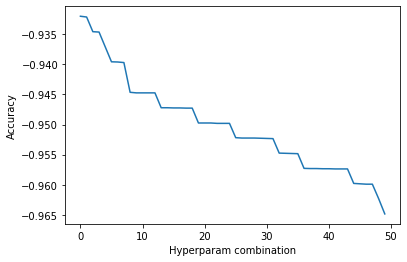

In [ ]:
trials = Trials()

second_search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=rand.suggest,  # randomized search
    trials = trials
)

# best hyperparameters

second_search

# the best hyperparameters can also be found in
# trials

trials.argmin

# the search hyperparameter combinations

pd.DataFrame(trials.vals).head()

results = pd.concat([
    pd.DataFrame(trials.vals),
    pd.DataFrame(trials.results)],
    axis=1,
).sort_values(by='loss', ascending=False).reset_index(drop=True)

print(results.head())

results['loss'].plot()
plt.ylabel('Accuracy')
plt.xlabel('Hyperparam combination')

# Bayesian Optimization

## Scikit-Optimize


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from skopt import dummy_minimize, gp_minimize, forest_minimize, gbrt_minimize # for the randomized search

# for the analysis
from skopt.plots import (
    plot_convergence,
    plot_evaluations,
)

from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

# load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [ ]:
# determine the hyperparameter space

param_grid = [
    Integer(10, 120, name="n_estimators"),
    Integer(1, 5, name="max_depth"),
    Real(0.0001, 0.1, prior='log-uniform', name='learning_rate'),
    Real(0.001, 0.999, prior='log-uniform', name="min_samples_split"),
    Categorical(['deviance', 'exponential'], name="loss"),
]

# Scikit-optimize parameter grid is a list
type(param_grid)

# set up the gradient boosting classifier

gbm = GradientBoostingClassifier(random_state=0)

# We design a function to maximize the accuracy, of a GBM,
# with cross-validation

# the decorator allows our objective function to receive the parameters as
# keyword arguments. This is a requirement for scikit-optimize.

@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    gbm.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            gbm, 
            X_train,
            y_train,
            cv=3,
            n_jobs=-4,
            scoring='accuracy')
    )

    # negate because we need to minimize
    return -value

### Random Search

Best score=-0.9523
Best parameters:
- n_estimators = 117
- max-depth = 2
- min_samples_split = 0.094
- learning_rate = 0.004
- loss = exponential


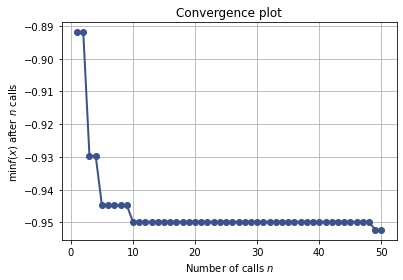

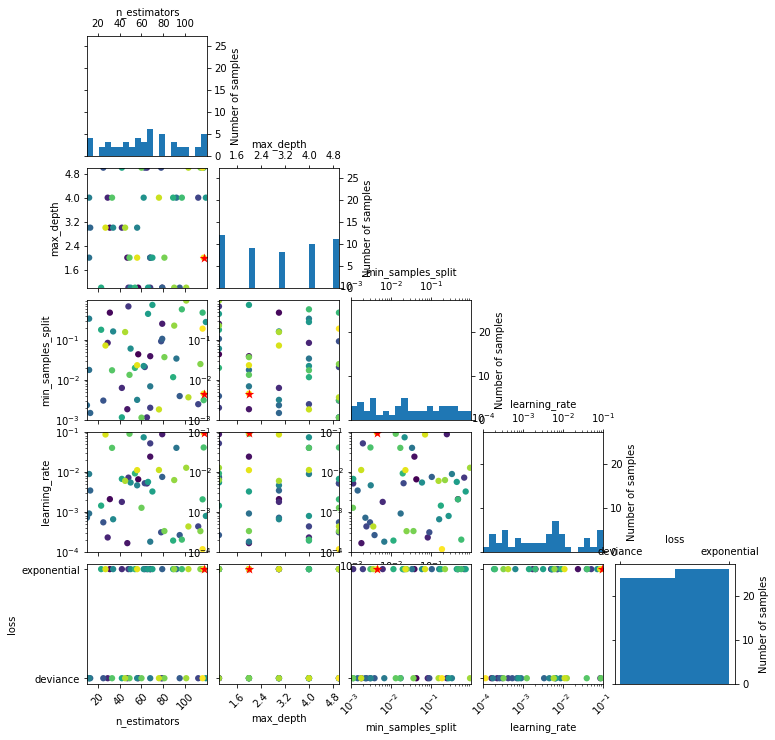

,n_estimators,max_depth,min_samples_split,learning_rate,loss,accuracy
48,117,2,0.093544,0.004473,exponential,-0.952267
9,68,1,0.050938,0.001985,exponential,-0.949761
19,92,4,0.039383,0.033627,exponential,-0.947273
25,62,4,0.072152,0.021937,exponential,-0.944748
4,79,1,0.086269,0.249533,deviance,-0.944710


In [ ]:
# dummy_minimize performs the randomized search

search = dummy_minimize(
    objective,  # the objective function to minimize
    param_grid,  # the hyperparameter space
    n_calls=50,  # the number of evaluations of the objective function
    random_state=0,
)

# function value at the minimum.
# note that it is the negative of the accuracy

print("Best score=%.4f" % search.fun)

print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- min_samples_split = %.3f
- learning_rate = %.3f
- loss = %s""" % (search.x[0], 
                search.x[1],
                search.x[2],
                search.x[3],
                search.x[4],
               ))

plot_convergence(search)

dim_names = ['n_estimators', 'max_depth', 'min_samples_split', 'learning_rate', 'loss']

plot_evaluations(result=search, plot_dims=dim_names)
plt.show()

# all together in one dataframe, so we can investigate further

tmp = pd.concat([
    pd.DataFrame(search.x_iters),
    pd.Series(search.func_vals),
], axis=1)

tmp.columns = dim_names + ['accuracy']

tmp.sort_values(by='accuracy', ascending=True, inplace=True)

tmp.head()

### Gaussian Process Manual

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=-0.9573
Best parameters:
- n_estimators = 120
- max-depth = 5
- min_samples_split = 0.100
- learning_rate = 0.999
- loss = exponential


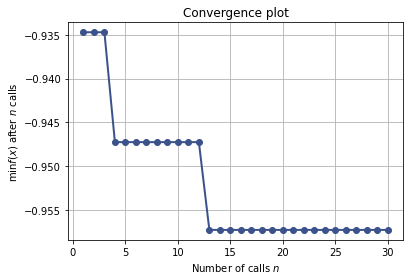

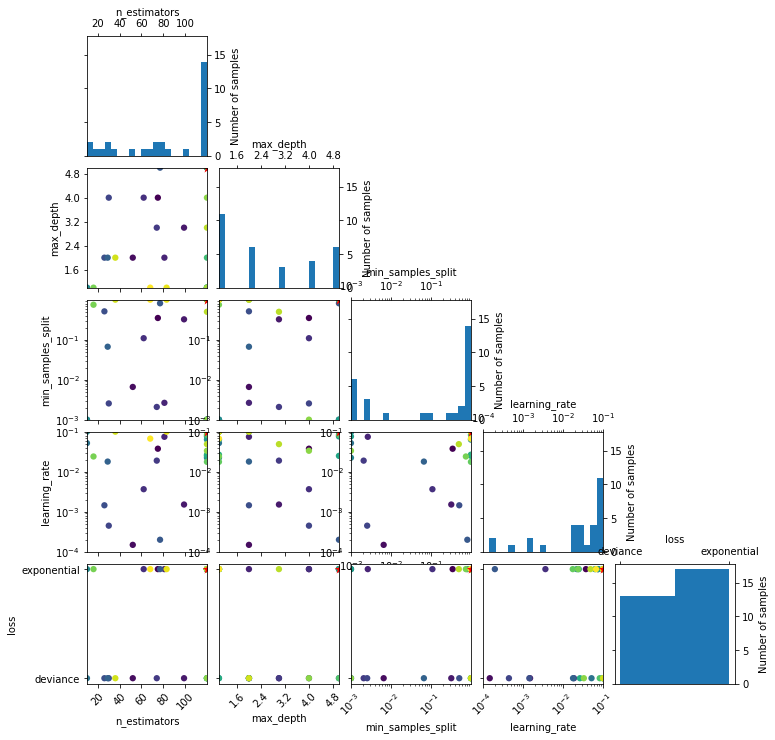

,n_estimators,max_depth,min_samples_split,learning_rate,loss,accuracy
25,120,1,0.1,0.999,exponential,-0.957280
20,120,2,0.1,0.999,deviance,-0.957280
19,120,1,0.1,0.999,exponential,-0.957280
12,120,5,0.1,0.999,exponential,-0.957280
28,83,1,0.1,0.999,exponential,-0.952248


In [ ]:
# gp_minimize performs by default GP Optimization 
# using a Marten Kernel

gp_ = gp_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    n_initial_points=10, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=30, # the number of subsequent evaluations of f(x)
    random_state=0,
)
# function value at the minimum.
# note that it is the negative of the accuracy

print("Best score=%.4f" % gp_.fun)

print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- min_samples_split = %.3f
- learning_rate = %.3f
- loss = %s""" % (gp_.x[0], 
                gp_.x[1],
                gp_.x[2],
                gp_.x[3],
                gp_.x[4],
               ))

plot_convergence(gp_)

dim_names = ['n_estimators', 'max_depth', 'min_samples_split', 'learning_rate', 'loss']

plot_evaluations(result=gp_, plot_dims=dim_names)
plt.show()

# all together in one dataframe, so we can investigate further

tmp = pd.concat([
    pd.DataFrame(gp_.x_iters),
    pd.Series(gp_.func_vals),
], axis=1)

tmp.columns = dim_names + ['accuracy']

tmp.sort_values(by='accuracy', ascending=True, inplace=True)

tmp.head()

### Random Forest

Best score=-0.9498
Best parameters:
- n_estimators = 68
- max-depth = 1
- min_samples_split = 0.051
- learning_rate = 0.002
- loss = exponential


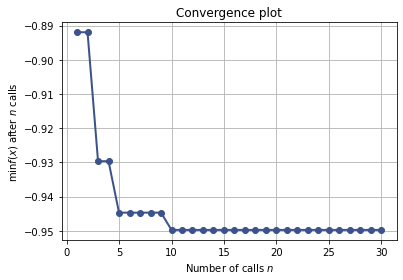

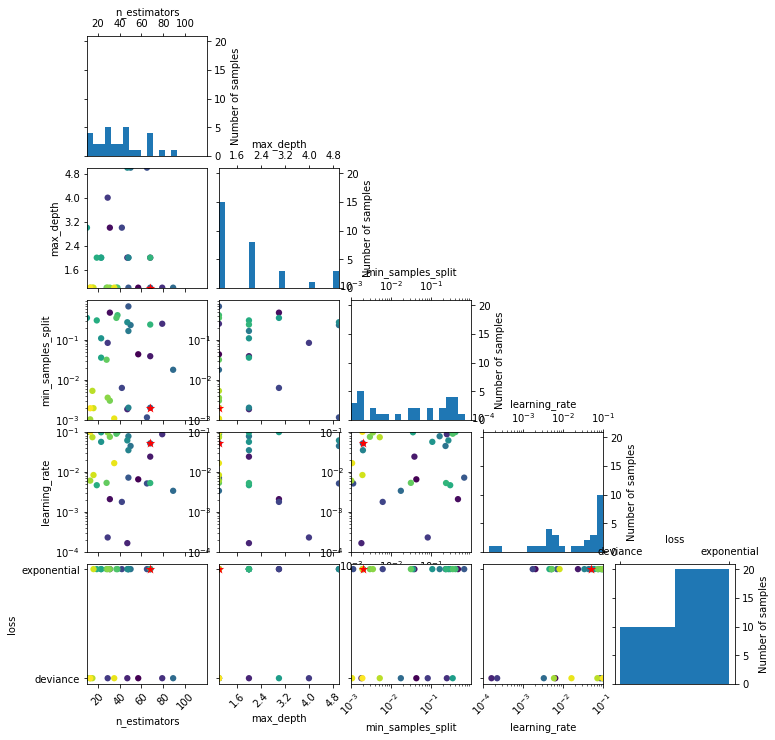

,n_estimators,max_depth,min_samples_split,learning_rate,loss,accuracy
24,29,1,0.095742,0.003541,exponential,-0.949761
21,37,1,0.088778,0.349843,exponential,-0.949761
9,68,1,0.050938,0.001985,exponential,-0.949761
20,38,1,0.097610,0.409173,exponential,-0.944729
4,79,1,0.086269,0.249533,deviance,-0.944710


In [ ]:
# forest_minimize performs Bayesian Optimization 
# using Random Forests as surrogate

fm_ = forest_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    base_estimator = 'RF', # the surrogate
    n_initial_points=10, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=30, # the number of subsequent evaluations of f(x)
    random_state=0, 
    n_jobs=4,
)

# function value at the minimum.
# note that it is the negative of the accuracy

print("Best score=%.4f" % fm_.fun)

print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- min_samples_split = %.3f
- learning_rate = %.3f
- loss = %s""" % (fm_.x[0], 
                fm_.x[1],
                fm_.x[2],
                fm_.x[3],
                fm_.x[4],
               ))

plot_convergence(fm_)

dim_names = ['n_estimators', 'max_depth', 'min_samples_split', 'learning_rate', 'loss']

plot_evaluations(result=fm_, plot_dims=dim_names)
plt.show()

# all together in one dataframe, so we can investigate further

tmp = pd.concat([
    pd.DataFrame(fm_.x_iters),
    pd.Series(fm_.func_vals),
], axis=1)

tmp.columns = dim_names + ['accuracy']

tmp.sort_values(by='accuracy', ascending=True, inplace=True)

tmp.head()

### GBM

Best score=-0.9498
Best parameters:
- n_estimators = 68
- max-depth = 1
- min_samples_split = 0.051
- learning_rate = 0.002
- loss = exponential


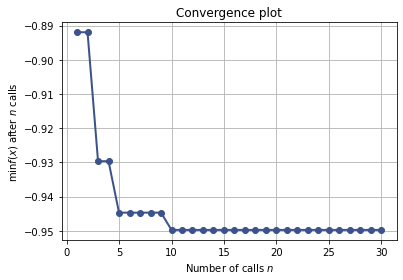

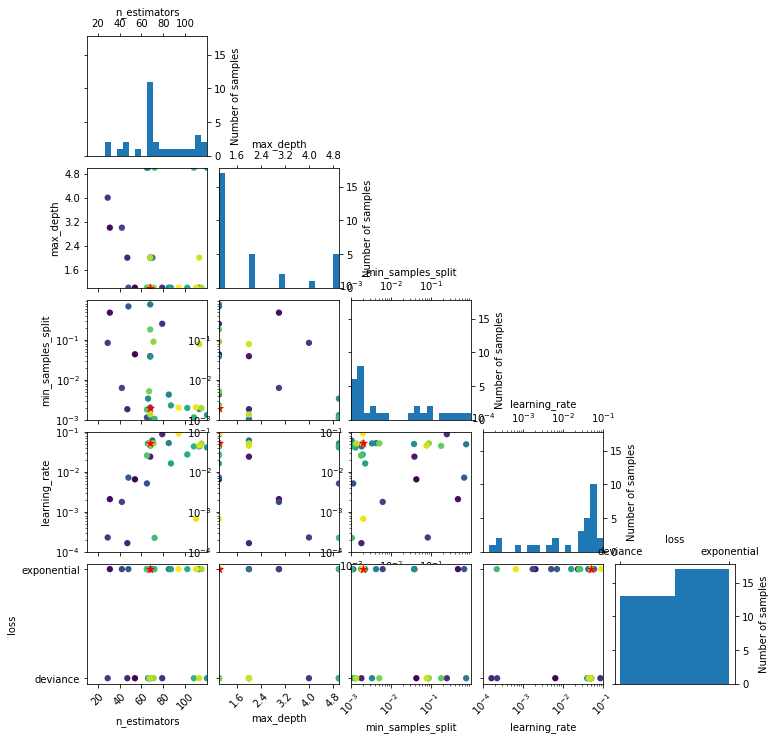

,n_estimators,max_depth,min_samples_split,learning_rate,loss,accuracy
9,68,1,0.050938,0.001985,exponential,-0.949761
24,71,1,0.051016,0.088779,deviance,-0.947254
23,67,1,0.050914,0.005125,deviance,-0.947254
22,68,1,0.044151,0.179335,deviance,-0.947254
18,102,1,0.026821,0.001965,exponential,-0.947254


In [ ]:
# gbrt_minimize performs by Bayesian Optimization 
# using GBMs as surrogate for f(x)

gbm_ = gbrt_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    n_initial_points=10, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=30, # the number of subsequent evaluations of f(x)
    random_state=0, 
    n_jobs=4,
)

# function value at the minimum.
# note that it is the negative of the accuracy

print("Best score=%.4f" % gbm_.fun)

print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- min_samples_split = %.3f
- learning_rate = %.3f
- loss = %s""" % (gbm_.x[0], 
                gbm_.x[1],
                gbm_.x[2],
                gbm_.x[3],
                gbm_.x[4],
               ))

plot_convergence(gbm_)

dim_names = ['n_estimators', 'max_depth', 'min_samples_split', 'learning_rate', 'loss']

plot_evaluations(result=gbm_, plot_dims=dim_names)
plt.show()

# all together in one dataframe, so we can investigate further

tmp = pd.concat([
    pd.DataFrame(gbm_.x_iters),
    pd.Series(gbm_.func_vals),
], axis=1)

tmp.columns = dim_names + ['accuracy']

tmp.sort_values(by='accuracy', ascending=True, inplace=True)

tmp.head()

## Hyperopt

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split

import xgboost as xgb

# hp: define the hyperparameter space
# fmin: optimization function
# Trials: to evaluate the different searched hyperparameters
from hyperopt import hp, fmin

# the search algorithms
from hyperopt import rand, anneal, tpe

# load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# determine the hyperparameter space

param_grid = {
    'n_estimators': hp.quniform('n_estimators', 200, 2500, 100),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1)),
    'booster': hp.choice('booster', ['gbtree', 'dart']),
    'gamma': hp.loguniform('gamma', np.log(0.01), np.log(10)),
    'subsample': hp.uniform('subsample', 0.50, 0.90),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.50, 0.99),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.50, 0.99),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.50, 0.99),
    'reg_lambda': hp.uniform('reg_lambda', 1, 20)
}

# the objective function takes the hyperparameter space
# as input

def objective(params):

    # we need a dictionary to indicate which value from the space
    # to attribute to each value of the hyperparameter in the xgb
    params_dict = {
        # important int, as it takes integers only
        'n_estimators': int(params['n_estimators']),
        # important int, as it takes integers only
        'max_depth': int(params['max_depth']),
        'learning_rate': params['learning_rate'],
        'booster': params['booster'],
        'gamma': params['gamma'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'colsample_bylevel': params['colsample_bylevel'],
        'colsample_bynode': params['colsample_bynode'],
        'random_state': 1000,
    }

    # with ** we pass the items in the dictionary as parameters
    # to the xgb
    gbm = xgb.XGBClassifier(**params_dict)

    # train with cv
    score = cross_val_score(gbm, X_train, y_train,
                            scoring='accuracy', cv=3, n_jobs=4).mean()

    # to minimize, we negate the score
    return -score

### Search

In [ ]:
# fmin performs the minimization
# rand.suggest samples the parameters at random
# i.e., performs the random search

random_search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=rand.suggest,  # randomized search
)

# create another dictionary to pass the search items as parameters
# to a new xgb

def create_param_grid(search, booster):
    best_hp_dict = {
            'n_estimators': int(search['n_estimators']), # important int, as it takes integers only
            'max_depth': int(search['max_depth']), # important int, as it takes integers only
            'learning_rate': search['learning_rate'],
            'booster': booster,
            'gamma': search['gamma'],
            'subsample': search['subsample'],
            'colsample_bytree': search['colsample_bytree'],
            'colsample_bylevel': search['colsample_bylevel'],
            'colsample_bynode': search['colsample_bynode'],
            'random_state': 1000,
    }
    return best_hp_dict

# after the search we can train the model with the
# best parameters manually

best_params = create_param_grid(random_search, 'gbtree')

gbm_rand = xgb.XGBClassifier(**best_params)

gbm_rand.fit(X_train, y_train)

X_train_preds = gbm_rand.predict_proba(X_train)[:,1]
X_test_preds = gbm_rand.predict_proba(X_test)[:,1]

print()
print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))


# fmin performs the minimization
# anneal.suggest samples the parameters

anneal_search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=anneal.suggest,  # annealing search
)

anneal_search

# after the search we can train the model with the
# best parameters manually

best_params = create_param_grid(anneal_search, 'gbtree')

gbm_anneal = xgb.XGBClassifier(**best_params)

gbm_anneal.fit(X_train, y_train)

X_train_preds = gbm_anneal.predict_proba(X_train)[:,1]
X_test_preds = gbm_anneal.predict_proba(X_test)[:,1]

print()
print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

# fmin performs the minimization
# tpe.suggest samples the parameters

tpe_search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=tpe.suggest,  # tpe
)

tpe_search

# after the search we can train the model with the
# best parameters manually

best_hp_dict = create_param_grid(tpe_search, 'gbtree')

gbm_final = xgb.XGBClassifier(**best_hp_dict)

gbm_final.fit(X_train, y_train)

X_train_preds = gbm_final.predict_proba(X_train)[:,1]
X_test_preds = gbm_final.predict_proba(X_test)[:,1]

print()
print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

100%|██████████| 50/50 [05:56<00:00,  7.13s/it, best loss: -0.9698488645857067]

Train roc_auc:  1.0
Test roc_auc:  0.9991181657848325
100%|██████████| 50/50 [04:04<00:00,  4.89s/it, best loss: -0.969905825168983]

Train roc_auc:  1.0
Test roc_auc:  0.9982363315696648
100%|██████████| 50/50 [04:01<00:00,  4.84s/it, best loss: -0.9698868383078909]

Train roc_auc:  1.0
Test roc_auc:  0.9989711934156378


### Conditional Search Multiple Models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 1250}
-0.9171223513328776
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                  

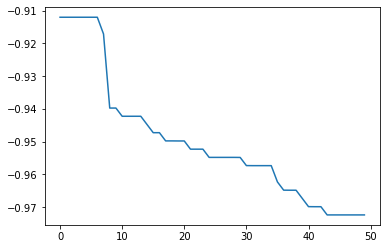

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# hp: define the hyperparameter space
# fmin: optimization function
# Trials: to evaluate the different searched hyperparameters
from hyperopt import hp, fmin, Trials

# the search algorithms
from hyperopt import anneal

# load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# ==================================
# determine the hyperparameter space
# ==================================

# we create dictionaries with 2 keys: "model" and "params"
# in "model" we specify the algorithm, in "params", we pass
# a dictionary with the space for that particular algorithm

# important: pass the model as class and not
# instantiated, thus LogisticRegression istead of
# LogisticRegression()

# within the params dictionaries, the keys should be
# the parameter names of the algos, as per their 
# documentation

# within the hp in each dictionary, give different names to
# later on identify to which model was the hyperparameter assigned
# see for example n_estimators_rf and n_estimators_gbm later


# the nested space
param_grid = hp.choice('classifier', [
    
    # algo 1
    {'model': LogisticRegression,
    'params': {
        'penalty': hp.choice('penalty', ['l1','l2']),
        'C' : hp.uniform('C', 0.001, 10),
        'solver': 'saga', # the only solver that works with both penalties
    }},
    
    # algo 2
    {'model': RandomForestClassifier,
    'params': {
        'n_estimators': hp.quniform('n_estimators_rf', 50, 1500, 50),
        'max_depth': hp.quniform('max_depth_rf', 1, 5, 1),
        'criterion': hp.choice('criterion_rf', ['gini', 'entropy']),
    }},
    
    # algo 3
    {'model': GradientBoostingClassifier,
    'params': {
        'n_estimators': hp.quniform('n_estimators_gbm', 50, 1500, 50),
        'max_depth': hp.quniform('max_depth_gbm', 1, 5, 1),
        'criterion': hp.choice('criterion_gbm', ['friedman_mse', 'mse']),
    }},
])

def objective(params):
    
    # instantiate the model
    model = params['model']() # don't forget the () to instantiate the class
    
    # capture the sampled hyperparameters
    hyperparams = params['params']
        
    try:        
        # for tree based algorithms
        hyperparams['n_estimators'] = int(hyperparams['n_estimators'])
        hyperparams['max_depth'] = int(hyperparams['max_depth'])
    except:
        pass        
        
    # in case you want to visualize what is being sampled:
    print(model, hyperparams)

    # pass the parameters to the model
    model.set_params(**hyperparams)

    # train with cv
    cross_val_data = cross_val_score(
        model,
        X_train,
        y_train,
        scoring='accuracy',
        cv=3,
        n_jobs=4,
    )

    # to minimize, we negate the score
    loss = -cross_val_data.mean()
    print(loss)
    print()
    
    return loss

# fmin performs the minimization
# anneal.suggest samples the parameters

trials = Trials()

anneal_search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=anneal.suggest,  # annealing search
    trials=trials
)

print(anneal_search)
print(trials.argmin)
print(trials.average_best_error())
print(trials.best_trial)
# convergence

pd.Series(trials.losses()).sort_values(ascending=False).reset_index(drop=True).plot()

## Optuna

### Search

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

import optuna

# load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

# the objective function takes the hyperparameter space
# as input

def objective(trial):

    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000)
    rf_criterion = trial.suggest_categorical("rf_criterion", ['gini', 'entropy'])
    rf_max_depth = trial.suggest_int("rf_max_depth", 1, 4)
    rf_min_samples_split = trial.suggest_float("rf_min_samples_split", 0.01, 1)
    
    model = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        criterion=rf_criterion,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
    )

    score = cross_val_score(model, X_train, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler(),
)


study.optimize(objective, n_trials=5)

print(study.best_params)

print(study.best_value)

print(study.trials_dataframe())


# TPE
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(),
)


study.optimize(objective, n_trials=5)
print(study.best_params)
print(study.best_value)

# CMA-ES
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.CmaEsSampler(),
)

study.optimize(objective, n_trials=5)
print(study.best_params)
print(study.best_value)

[I 2021-06-22 14:43:54,794] A new study created in memory with name: no-name-5e1d03ed-a73d-47fe-8c27-fa428f64d189
[I 2021-06-22 14:43:57,106] Trial 0 finished with value: 0.9371724766461608 and parameters: {'rf_n_estimators': 511, 'rf_criterion': 'gini', 'rf_max_depth': 3, 'rf_min_samples_split': 0.37875929829262867}. Best is trial 0 with value: 0.9371724766461608.
[I 2021-06-22 14:43:59,764] Trial 1 finished with value: 0.942222981696666 and parameters: {'rf_n_estimators': 513, 'rf_criterion': 'entropy', 'rf_max_depth': 3, 'rf_min_samples_split': 0.21577293450147222}. Best is trial 1 with value: 0.942222981696666.
[I 2021-06-22 14:44:01,097] Trial 2 finished with value: 0.6256360598465861 and parameters: {'rf_n_estimators': 335, 'rf_criterion': 'gini', 'rf_max_depth': 1, 'rf_min_samples_split': 0.8705454071830109}. Best is trial 1 with value: 0.942222981696666.
[I 2021-06-22 14:44:04,387] Trial 3 finished with value: 0.6256360598465861 and parameters: {'rf_n_estimators': 832, 'rf_crit

{'rf_n_estimators': 513, 'rf_criterion': 'entropy', 'rf_max_depth': 3, 'rf_min_samples_split': 0.21577293450147222}
0.942222981696666
   number     value  ... params_rf_n_estimators     state
0       0  0.937172  ...                    511  COMPLETE
1       1  0.942223  ...                    513  COMPLETE
2       2  0.625636  ...                    335  COMPLETE
3       3  0.625636  ...                    832  COMPLETE
4       4  0.625636  ...                    241  COMPLETE

[5 rows x 10 columns]


[I 2021-06-22 14:44:08,701] Trial 0 finished with value: 0.9321409584567478 and parameters: {'rf_n_estimators': 723, 'rf_criterion': 'gini', 'rf_max_depth': 3, 'rf_min_samples_split': 0.31897908665153163}. Best is trial 0 with value: 0.9321409584567478.
[I 2021-06-22 14:44:12,701] Trial 1 finished with value: 0.9171223513328776 and parameters: {'rf_n_estimators': 880, 'rf_criterion': 'entropy', 'rf_max_depth': 4, 'rf_min_samples_split': 0.5810674470654155}. Best is trial 0 with value: 0.9321409584567478.
[I 2021-06-22 14:44:16,892] Trial 2 finished with value: 0.9346851978430926 and parameters: {'rf_n_estimators': 890, 'rf_criterion': 'entropy', 'rf_max_depth': 3, 'rf_min_samples_split': 0.4173151736944463}. Best is trial 2 with value: 0.9346851978430926.
[I 2021-06-22 14:44:20,814] Trial 3 finished with value: 0.6256360598465861 and parameters: {'rf_n_estimators': 979, 'rf_criterion': 'gini', 'rf_max_depth': 2, 'rf_min_samples_split': 0.8217995575181323}. Best is trial 2 with value: 0

{'rf_n_estimators': 890, 'rf_criterion': 'entropy', 'rf_max_depth': 3, 'rf_min_samples_split': 0.4173151736944463}
0.9346851978430926


[I 2021-06-22 14:44:24,524] Trial 0 finished with value: 0.9196476038581302 and parameters: {'rf_n_estimators': 430, 'rf_criterion': 'gini', 'rf_max_depth': 2, 'rf_min_samples_split': 0.6151449836207126}. Best is trial 0 with value: 0.9196476038581302.
[W 2021-06-22 14:44:24,547] The parameter 'rf_criterion' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[I 2021-06-22 14:44:26,823] Trial 1 finished with value: 0.6256360598465861 and parameters: {'rf_n_estimators': 550, 'rf_criterion': 'gini', 'rf_max_depth': 3, 'rf_min_samples_split': 0.7669794051776813}. Best is trial 0 with value: 0.9196476038581302.
[W 2021-06-22 14:44:26,830] The parameter 'rf_criterio

{'rf_n_estimators': 550, 'rf_criterion': 'entropy', 'rf_max_depth': 2, 'rf_min_samples_split': 0.4476243338544131}
0.9221538695222905


### Conditional Spaces Multiple Model

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import optuna

# load dataset

breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

# the objective function takes the hyperparameter space
# as input

def objective(trial):
    
    classifier_name = trial.suggest_categorical("classifier", ["logit", "RF", 'GBM'])
    
    if classifier_name == "logit":
        
        logit_penalty = trial.suggest_categorical('logit_penalty', ['l1','l2'])
        logit_c = trial.suggest_float('logit_c', 0.001, 10)
        logit_solver = 'saga'
        
        model = LogisticRegression(
            penalty=logit_penalty,
            C=logit_c,
            solver=logit_solver,
        )
        
    elif classifier_name =="RF":
        
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000)
        rf_criterion = trial.suggest_categorical("rf_criterion", ['gini', 'entropy'])
        rf_max_depth = trial.suggest_int("rf_max_depth", 1, 4)
        rf_min_samples_split = trial.suggest_float("rf_min_samples_split", 0.01, 1)

        model = RandomForestClassifier(
            n_estimators=rf_n_estimators,
            criterion=rf_criterion,
            max_depth=rf_max_depth,
            min_samples_split=rf_min_samples_split,
        )
        
    else:
        
        gbm_n_estimators = trial.suggest_int("gbm_n_estimators", 100, 1000)
        gbm_criterion = trial.suggest_categorical("gbm_criterion", ['mse', 'friedman_mse'])
        gbm_max_depth = trial.suggest_int("gbm_max_depth", 1, 4)
        gbm_min_samples_split = trial.suggest_float("gbm_min_samples_split", 0.01, 1)

        model = GradientBoostingClassifier(
            n_estimators=gbm_n_estimators,
            criterion=gbm_criterion,
            max_depth=gbm_max_depth,
            min_samples_split=gbm_min_samples_split,
        )

    
    score = cross_val_score(model, X_train, y_train, cv=3)
    accuracy = score.mean()
    
    return accuracy

study = optuna.create_study(
    direction="maximize",
    # we do not need the below line, 
    # tpe is the default search
    sampler=optuna.samplers.TPESampler(),
)


study.optimize(objective, n_trials=20)
print(study.best_params)

print(study.best_value)

print(study.trials_dataframe())

[I 2021-06-22 14:44:55,396] A new study created in memory with name: no-name-3b9e6c65-8e5d-4486-bf35-74a7e722aca1
[I 2021-06-22 14:44:56,857] Trial 0 finished with value: 0.9171223513328776 and parameters: {'classifier': 'RF', 'rf_n_estimators': 319, 'rf_criterion': 'entropy', 'rf_max_depth': 1, 'rf_min_samples_split': 0.05670341175719665}. Best is trial 0 with value: 0.9171223513328776.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2021-06-22 14:44:56,925] Trial 1 finished with value: 0.9120148856990963 and parameters: {'classifier': 'logit', 'logit_penalty':

{'classifier': 'GBM', 'gbm_n_estimators': 316, 'gbm_criterion': 'friedman_mse', 'gbm_max_depth': 2, 'gbm_min_samples_split': 0.743245138601854}
0.9698488645857067
    number     value  ... params_rf_n_estimators     state
0        0  0.917122  ...                  319.0  COMPLETE
1        1  0.912015  ...                    NaN  COMPLETE
2        2  0.914616  ...                  543.0  COMPLETE
3        3  0.962292  ...                    NaN  COMPLETE
4        4  0.967324  ...                    NaN  COMPLETE
5        5  0.967324  ...                    NaN  COMPLETE
6        6  0.912015  ...                    NaN  COMPLETE
7        7  0.939698  ...                  781.0  COMPLETE
8        8  0.962292  ...                    NaN  COMPLETE
9        9  0.969849  ...                    NaN  COMPLETE
10      10  0.954773  ...                    NaN  COMPLETE
11      11  0.964817  ...                    NaN  COMPLETE
12      12  0.962330  ...                    NaN  COMPLETE
13      13 

                       mean       std
params_classifier                    
GBM                0.962127  0.006258
RF                 0.923812  0.013814
logit              0.912015  0.000000


Text(0, 0.5, 'Accuracy')

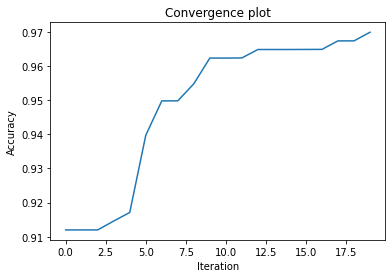

In [ ]:
results = study.trials_dataframe()

results['params_classifier'].value_counts()

print(results.groupby(['params_classifier'])['value'].agg(['mean', 'std']))

results['value'].sort_values().reset_index(drop=True).plot()
plt.title('Convergence plot')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')